In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc
import scipy.integrate
from tqdm.notebook import tqdm

In [8]:
def v_tilde(ns, k):
    return 1/k * ns**2
    #return - np.log(scipy.special.jv(ns, k) / scipy.special.jv(0, k))

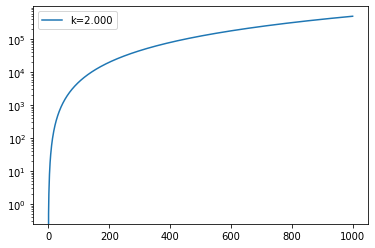

In [22]:
L = 8

inv_ks = list(np.linspace(0.5,1.5,60))
inv_ks = np.array(list(sorted(set(inv_ks))))
inv_k = inv_ks[0]

vns = v_tilde(np.arange(0,1000), 1./inv_k)

plt.plot(vns, label="k={:.3f}".format(1./inv_k))
plt.legend()
plt.yscale('log')
plt.show()

graph = py_gauge_mc.GPUGaugeTheory(L,L,L,L,vns)
graph.run_local_update(1000)

In [15]:
res = graph.simulate_and_get_winding_nums(1000, steps_per_sample=100)
res

array([[[ 1,  1,  0, -1, -2,  1],
        [ 1,  1,  0,  0, -2,  1],
        [ 0,  1,  0,  0, -2,  1],
        ...,
        [-2,  0, -1,  0,  1,  1],
        [-2,  0, -1,  0,  1,  1],
        [-2,  0,  0,  0,  1,  1]]])

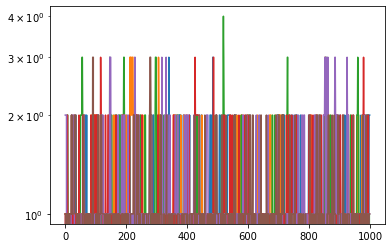

In [16]:
for i in range(6):
    plt.plot(abs(res[0,:,i]))
plt.yscale('log')

In [20]:
res.shape

(1, 1000, 6)

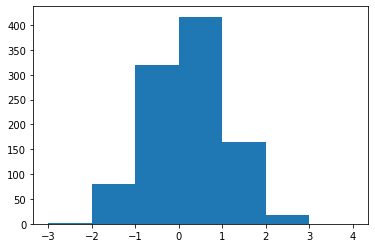

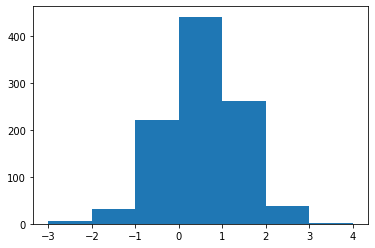

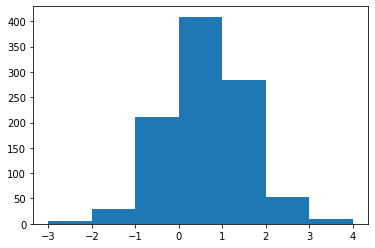

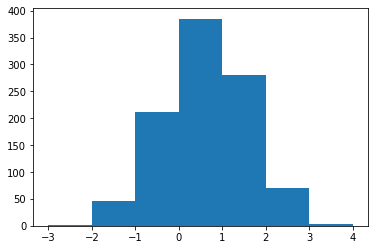

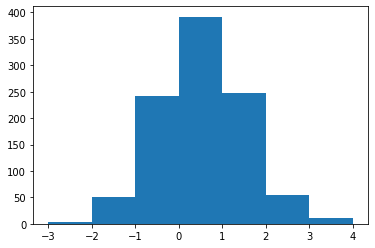

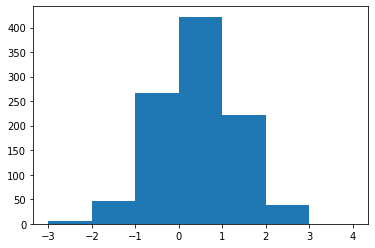

In [21]:
bins = np.arange(np.min(res), np.max(res)+1)
for i in range(res.shape[-1]):
    plt.hist(res[0,:,i], bins=bins)
    plt.show()